# BL Lac SED plot figure (version 2)
## using the lowest chi^2 and use the plotting parameters to plot figure

In [3]:
# import numpy, astropy and matplotlib for basic functionalities
import numpy as np
import pkg_resources
import pandas as pd
from pathlib import Path
import os, sys
from astropy.constants import c
from astropy.coordinates import Distance
from astropy.table import Table
import astropy.units as u
import matplotlib.pyplot as plt
#%matplotlib widget


In [9]:
### 2023/4/13 comment: BL Lac with z measurement => PLOT SED first

Table = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/data/BZCAT_Xmatch_ACC_list.csv')

Table_name = Table['name'].values
Table_class_type = Table['Class'].values
Table_z = Table['z'].values
    
classnameall = []
QSOind = []
BL_Lac_can_ind = []
BL_Lac_galaxy_dom_ind = []
BL_Lac_ind = []
Blazar_ind = []
classclassify = [Blazar_ind, BL_Lac_can_ind, BL_Lac_galaxy_dom_ind, QSOind, BL_Lac_ind]
classnameall  = [' Blazar Uncertain type', ' BL Lac Candidate', ' BL Lac-galaxy dominated', ' QSO RLoud flat radio sp.', ' BL Lac']
    
for j in range(0, 5): # 1367
    classclassify[j] = np.where( Table_class_type == classnameall[j] )[0]
    
BL_Lac_index = []

BL_Lac_index = np.hstack([np.array( classclassify[1] ), np.array( classclassify[2] ), np.array( classclassify[4] )])

BL_Lac_z = Table_z[ BL_Lac_index ]

index = BL_Lac_index[ BL_Lac_z != 0 ] # 93 BL Lac sources have z measurement



In [ ]:
### read in redshift information
path = "/Users/87steven/Downloads/2023_2_15 SED model fit/SED model fit parameters"
dir_list = os.listdir(path) 
dir_list.remove('.DS_Store')

source_name = []
for i in range(0, len(dir_list)): 
    source_name.append( dir_list[i][0:10] )

for i in range(0, len(index)):   # len(BL_Lac_name)
    #######################################################################################################
    ### define test source name and set initial setting parameters
    #######################################################################################################
    #name = 'J1256-0547'
    #name = 'J2337-5216'
    #name = 'J0854+2006' # good source
    name = Table_name[i]
    
    if os.path.exists( '/Users/87steven/Downloads/2023_2_15 SED model fit/SED model fit parameters/'+name+'_SED_model fit parameters.csv' ):
        print('i = ', i, ', source name =', name)

        ### create figure saving path
        path2 = f'/Users/87steven/Documents/ASIAA/Blazar SED progress/SED model fit figures/'+ name +' SED model fit figure'
        if not os.path.isdir(path2):
            os.mkdir( path2 )

        ### read in SED fitting result (chi_square value)
        SED_result = pd.read_csv('/Users/87steven/Downloads/2023_2_15 SED model fit/SED model fit parameters/'+name+'_SED_model fit parameters.csv') 

        chi_squ = SED_result['chi_2'].values
        index = np.where( chi_squ < np.ceil(min(chi_squ)) )[0]

        ### read in source flux
        source = pd.read_csv('/Users/87steven/Documents/ASIAA/Blazar SED code and data/source individual flux/' + name + '_flux.csv') 

        freq = source['freq'].values
        flux = source['flux'].values
        flux_err = source['flux_err'].values

        ### set flux error which is nan to 0.01
        flux_err[np.isnan(flux_err)] = 0.01
        ### find flux index which is not nan
        flux_NOTnan = np.where( (~np.isnan(flux)) & (flux > 0) )[0]
        ### save new data into array
        freq = freq[flux_NOTnan]
        flux = flux[flux_NOTnan]
        flux_err = flux_err[flux_NOTnan]

        flux_err_correct = flux_err/0.434*flux

        for k in range(0, len(index)):   # len(index)
            print('plotting numer', k, '/', len(index))
            ### read in SED plotting parameters
            SED_plotting = pd.read_csv('/Users/87steven/Downloads/2023_2_15 SED model fit/SED model fit plotting parameters/'+name+' SED model fit/'+name+'_'+str(index[k])+'.csv') # # = 37671

            fit_x = SED_plotting['fit_x'].values
            fit_y = SED_plotting['fit_y'].values
            syn_x = SED_plotting['syn_x'].values
            syn_y =SED_plotting['syn_y'].values
            ssc_x = SED_plotting['ssc_x'].values
            ssc_y = SED_plotting['ssc_y'].values

            plt.rcParams['figure.figsize'] = [10, 8]
            plt.rcParams['axes.linewidth'] = 2

            fig, ax = plt.subplots()

            # plot data point
            ax.errorbar(np.log10(freq), flux, yerr = flux_err_correct, marker = "o", color = "black", ecolor = "black", linestyle = '') 
            # plot model fit line
            ax.plot(np.log10(fit_x), fit_y, '-', color = 'red')
            #ax.plot(np.log10(fit_x), np.log10(fit_y), '-', color = color[i], label = 'Total SED')

            # plot emission region
            ax.plot(np.log10(syn_x+ssc_x), syn_y + ssc_y, '--', color = 'orange', label = 'Synchrotron+SSC')
            ax.plot(np.log10(syn_x), syn_y, '--', color = 'blue', alpha = 0.5, label = 'Synchrotron')
            ax.plot(np.log10(ssc_x), ssc_y, '--', color = 'green', alpha = 0.5, label = 'SSC')

            ax.set_xlim (7, 29)
            ax.set_ylim (min(flux)*1.0E-2, max(flux)*1.0E1) 
            plt.yscale('log')

            plt.legend(loc = 'upper left', shadow = True, fontsize = 14, markerscale = 1) 

            plt.xlabel( "log($\\nu$) [Hz]",  fontsize = 16)
            plt.xticks(fontsize = 16)
            plt.ylabel('$\\nu$ F($\\nu$) [erg $\mathrm{cm^{-2}\ s^{-1}}$]',  fontsize = 16)
            plt.yticks(fontsize = 16)
            plt.grid(True)
            figurename = name+' SED Fitting ($\\chi^2$ = %9.7E)' %(chi_squ[index[k]]) 
            plt.title(figurename, fontsize = 16)

            # plotname = '/Users/87steven/Documents/ASIAA/Blazar SED progress/SED model fit figures/'+ name +' SED model fit figure/SED of '+ name + ' chi_squ = ' +str(chi_squ[index[k]]) + '.pdf'
            # fig.savefig(plotname, bbox_inches = 'tight')

        print('==========' + name +" SED model fit figure produce complete ==========")
    else: 
        print('==========' + name +" SED model fit file does not exist ==========")


In [11]:
### read in redshift information
path = "/Users/87steven/Downloads/2023_2_15 SED model fit/SED model fit parameters"
dir_list = os.listdir(path) 
dir_list.remove('.DS_Store')

source_name = []
for i in range(0, len(dir_list)): 
    source_name.append( dir_list[i][0:10] )

for i in range(0, len(index)):   # len(BL_Lac_name)
    #######################################################################################################
    ### define test source name and set initial setting parameters
    #######################################################################################################
    #name = 'J1256-0547'
    #name = 'J2337-5216'
    #name = 'J0854+2006' # good source
    name = 'J1256-1146'

    SED_result = pd.read_csv('/Users/87steven/Downloads/2023_2_15 SED model fit/SED model fit parameters/'+name+'_SED_model fit parameters.csv') 

    chi_squ = SED_result['chi_2'].values
    index = np.where( chi_squ < np.ceil(min(chi_squ)) )[0]
    

(10.0, 16.0)

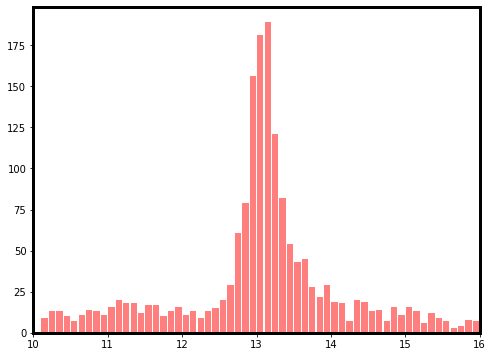

In [24]:
median_chi = np.nanmedian( chi_squ )
std_chi = np.nanstd( chi_squ )

interval_plus = median_chi+3 #*std_chi
interval_minus = median_chi-3 #*std_chi

index = np.where( (interval_minus < chi_squ) & (chi_squ < interval_plus) )[0]

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.linewidth'] = 3
    
fig, ax = plt.subplots()

n, bins, p = plt.hist(chi_squ[index], bins = np.arange(0., max(chi_squ[index]) +0.1, 0.1), density = False,
                                color = 'red', alpha = 0.5, rwidth = 0.85)
# set maxximum value of y-axis = 1
# for item in p:
#     item.set_height(item.get_height()/sum(n))
    
ax.set_xlim(10, 16)
# ax.set_ylim(0, 1)   


In [20]:
max(chi_squ[index])

16.141281155831447

In [ ]:
import pandas as pd
import os, sys

def ClearData():
    data = {
    'wavelength': [],
    'flux': [],
    }
    return data

path = '/Users/87steven/Downloads/dz/'

dir_list = os.listdir(path) 
#dir_list.remove('.DS_Store')

for i in range(0, len(dir_list)):   # len(dir_list)
    df = ClearData()
    print('file name: ', dir_list[i])
    Table = pd.read_csv(path + dir_list[i], header = None)
    
    for k in range(0, len(Table[0])):
        df['wavelength'].append( Table[0][k].split()[0] )
        df['flux'].append( Table[0][k].split()[1] )

    CSVfile = path + dir_list[i][:-4] + '.csv'   
    dff = pd.DataFrame(df)      
    dff.to_csv(CSVfile, index = False)
    
    print('done')